In [4]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import seaborn as sns

***Reading the Dataset***

In [5]:
df = pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec20_updated.csv')
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

***Summary Statistics***

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [8]:
rows = df.shape[0]
cols = df.shape[1]
print("There are " + str(rows) + " rows and " + str(cols) + " columns in this dataframe.")

There are 1516064 rows and 47 columns in this dataframe.


***Finding the Number of Numeric columns in the Dataset***

In [13]:
# Finding total number of numeric columns in  the dataframe
numerics=['int16', 'int32', 'int64', "float16", "float32", "float64"]
num=df.select_dtypes(include=numerics)
print(len(num.columns))
print(num)

14
         Severity  Start_Lat  ...  Wind_Speed(mph)  Precipitation(in)
0               3   40.10891  ...             10.4               0.00
1               2   39.86542  ...              NaN               0.02
2               2   39.10266  ...              NaN               0.02
3               2   39.10148  ...              NaN               0.02
4               2   41.06213  ...              NaN                NaN
...           ...        ...  ...              ...                ...
1516059         2   34.00248  ...             13.0               0.00
1516060         2   32.76696  ...              6.0               0.00
1516061         2   33.77545  ...             10.0               0.00
1516062         2   33.99246  ...              8.0               0.00
1516063         2   34.13393  ...              7.0               0.00

[1516064 rows x 14 columns]


***Finding the Percentage of Missing Values in each Columns***

In [18]:
missing_value_percent=df.isna().sum().sort_values(ascending=False)/len(df)
missing_value_percent

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
Amenity                  0.000000
Bump                     0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Description   

**Plotting the Null Value Percent for columns having Null Values**

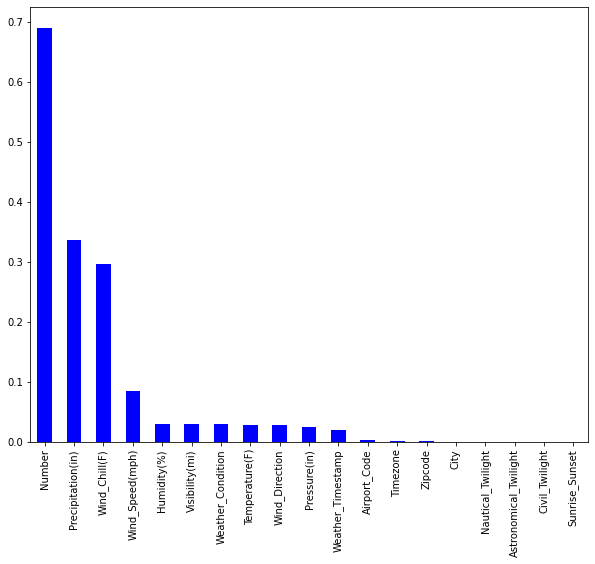

In [26]:
missing_value_plot=missing_value_percent[missing_vale_percent>0]
missing_value_plot.plot.bar(figsize=(10,8), color='blue')

**If the percentage of null value is geater then 50%, then it is better to drop the columns. In our case we are dropping the columns**

In [27]:
df.drop('Number', axis=1, inplace=True)

In [28]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

***EXPLORATORY DATA ANALYSIS AND VISUVALIZATION***

Columns we will be Analyzing

1.City

2.State

3.Start Lat, Start Lng

4.Temperatue 

5.Weather Conditions

***City***

In [32]:
Cities = df.City.unique()
print(len(Cities))
Cities

10658


array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

***Top 10 Cities with High number of Accidents***


In [42]:
# To 10 Cities with huge Accidents
Top_accident_cities=df.City.value_counts().sort_values(ascending=False)[:10]
print(Top_accident_cities)

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64


In [53]:
top_city_dataframe=Top_accident_cities.to_frame()
top_city_dataframe['Accident Percentage']=(top_city_dataframe['City']/len(df))*100

***Number of Accidents in Top 10 Cities where accidents are Huge***

In [95]:
top_city_dataframe.rename(columns={'City':'Number of Accidents'}, inplace = True)
top_city_dataframe

,Number of Accidents,Accident Percentage
Los Angeles,39984,2.637356
Miami,36233,2.389939
Charlotte,22203,1.464516
Houston,20843,1.374810
Dallas,19497,1.286028
Sacramento,18431,1.215714
Orlando,16169,1.066512
Portland,14805,0.976542
San Diego,14090,0.929380
Minneapolis,12653,0.834595


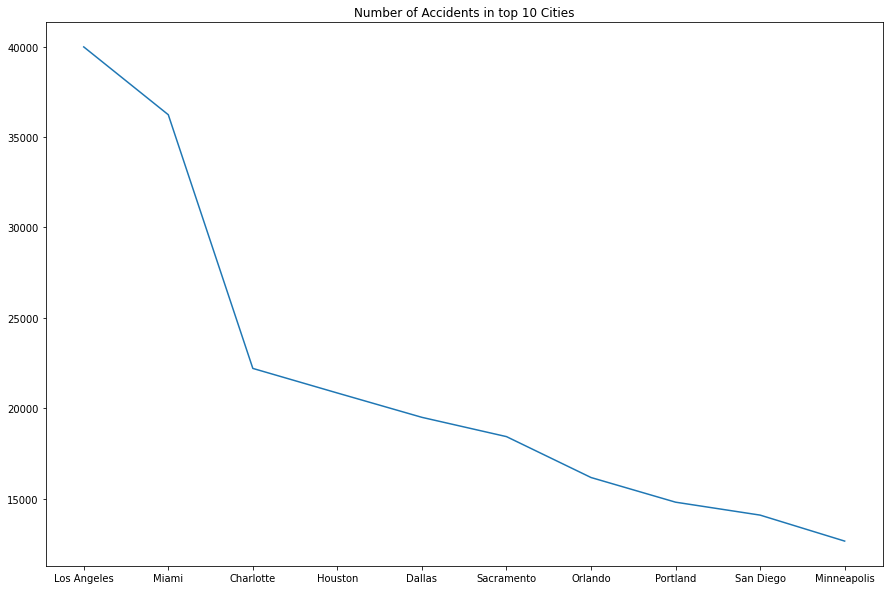

In [96]:
plt.figure(figsize=(15,10))
plt.title('Number of Accidents in top 10 Cities')
plt.plot(top_city_dataframe.index, top_city_dataframe['Number of Accidents'])
plt.show()

***Proportion of Top 10 cities in total accidents***

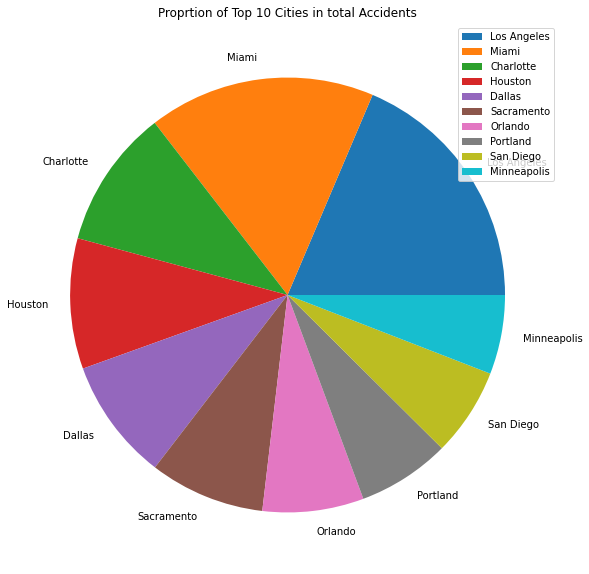

In [92]:
plt.figure(figsize=(15,10))
plt.title('Proprtion of Top 10 Cities in total Accidents')
plt.pie(top_city_dataframe['Accident Percentage'], labels=(top_city_dataframe.index))
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



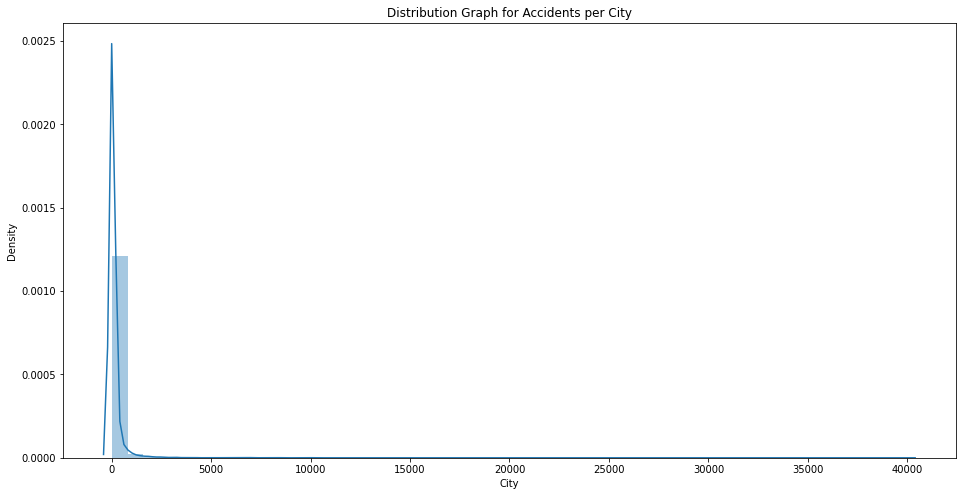

In [99]:
plt.figure(figsize=(16,8))
sns.distplot(df.City.value_counts())
plt.title("Distribution Graph for Accidents per City")
plt.show()

***Top 10 Cities with least number of accidents***

In [104]:
df.City.value_counts().tail(10)

Lovejoy               1
Francesville          1
College Station       1
Baird                 1
University Heights    1
Cummington            1
Carbon                1
Woodgate              1
Fields                1
Amber                 1
Name: City, dtype: int64

***What is the Total Number  of Accidents in the city of Los Angels  in each Weekday? ***


In [148]:
Los_Angeles_df=df[df['City']=='Los Angeles']
Los_Angeles_df['Occured Year']=pd.DatetimeIndex(Los_Angeles_df['Start_Time']).year
Los_Angeles_df['Start_Time']=pd.to_datetime(Los_Angeles_df['Start_Time'])
Los_Angeles_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Occured Year
5360,A-2721960,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.09256,-118.206220,34.092560,-118.206220,0.000,At Avenue 43 - Accident.,CA-110 N,R,Los Angeles,Los Angeles,CA,90031,US,US/Pacific,KCQT,2016-03-22 19:47:00,64.0,NaN,24.0,30.00,10.0,NNW,9.2,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Night,Night,Day,Day,2016
5364,A-2721964,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.94819,-118.279730,33.946760,-118.279750,0.099,At Century Blvd - Accident.,I-110 S,R,Los Angeles,Los Angeles,CA,90003,US,US/Pacific,KHHR,2016-03-22 20:53:00,64.0,NaN,23.0,30.02,10.0,NNW,11.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016
5379,A-2721979,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.02330,-118.172880,34.021380,-118.173390,0.136,At Whittier Blvd/Olympic Blvd - Accident.,Long Beach Fwy S,R,Los Angeles,Los Angeles,CA,90022,US,US/Pacific,KCQT,2016-03-23 07:47:00,55.9,NaN,53.0,30.11,10.0,Calm,NaN,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016
5397,A-2721997,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.14470,-118.278650,34.141040,-118.277840,0.257,At Colorado St - Accident.,Golden State Fwy S,R,Los Angeles,Los Angeles,CA,90027,US,US/Pacific,KCQT,2016-03-23 11:47:00,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016
5399,A-2721999,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.09914,-118.251853,34.099817,-118.251396,0.054,At I-5/Golden State Fwy - Accident. Left lane ...,CA-2 S,R,Los Angeles,Los Angeles,CA,90039,US,US/Pacific,KCQT,2016-03-23 11:47:00,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515619,A-4238962,2,2019-08-22 17:07:14,2019-08-22 17:36:02,34.03693,-118.438770,34.025590,-118.429180,0.957,At I-10/Santa Monica Fwy - Accident.,San Diego Fwy S,R,Los Angeles,Los Angeles,CA,90064,US,US/Pacific,KSMO,2019-08-22 16:51:00,72.0,72.0,76.0,29.57,10.0,SW,8.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019
1516027,A-4239370,3,2019-08-23 04:04:48,2019-08-23 04:33:53,34.07579,-118.276680,34.074310,-118.272250,0.273,At Benton Way/Rampart Blvd/Exit 5A - Accident.,Hollywood Fwy S,R,Los Angeles,Los Angeles,CA,90026,US,US/Pacific,KCQT,2019-08-23 03:52:00,67.0,67.0,79.0,29.62,7.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019
1516031,A-4239374,2,2019-08-23 12:52:31,2019-08-23 13:20:14,34.02379,-118.276390,34.025760,-118.275290,0.150,At 28th St - Accident.,Harbor Fwy N,R,Los Angeles,Los Angeles,CA,90007,US,US/Pacific,KCQT,2019-08-23 12:52:00,81.0,81.0,49.0,29.66,8.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019
1516034,A-4239377,2,2019-08-23 13:42:50,2019-08-23 14:10:06,34.07061,-118.263910,34.069740,-118.261550,0.148,At Glendale Blvd/Union Ave - Accident.,Hollywood Fwy S,R,Los Angeles,Los Angeles,CA,90026,US,US/Pacific,KCQT,2019-08-23 13:52:00,82.0,82.0,47.0,29.65,9.0,CALM,0.0,0.0,Fair,False,False,F

In [149]:
Los_Angeles_df['weekday'] = Los_Angeles_df['Start_Time'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
day_list=[]
count_list=[]
y=0
for i in range(7) :
  print(i)
  count_of_accidents=len(Los_Angeles_df[Los_Angeles_df['weekday']==int(i)])
  if int(i)==0:
    day='Sunday'
  elif int(i)==1 :
    day = 'Monday'
  elif int(i)==2 :
    day ='Tuesday'
  elif int(i)==3 :
    day = 'Wednesday'
  elif int(i)==4 :
    day ='Thursday'
  elif int(i)==5 :
    day ='Friday'
  else :
    day = 'Saturday'
  day_list.append(day)
  count_list.append(count_of_accidents)
  print('The number of accidents for the weekday '+day+ ' in Los Angeles is '+str(count_of_accidents))
  

0
The number of accidents for the weekday Sunday in Los Angeles is 6393
1
The number of accidents for the weekday Monday in Los Angeles is 6893
2
The number of accidents for the weekday Tuesday in Los Angeles is 6296
3
The number of accidents for the weekday Wednesday in Los Angeles is 6245
4
The number of accidents for the weekday Thursday in Los Angeles is 6762
5
The number of accidents for the weekday Friday in Los Angeles is 3790
6
The number of accidents for the weekday Saturday in Los Angeles is 3605


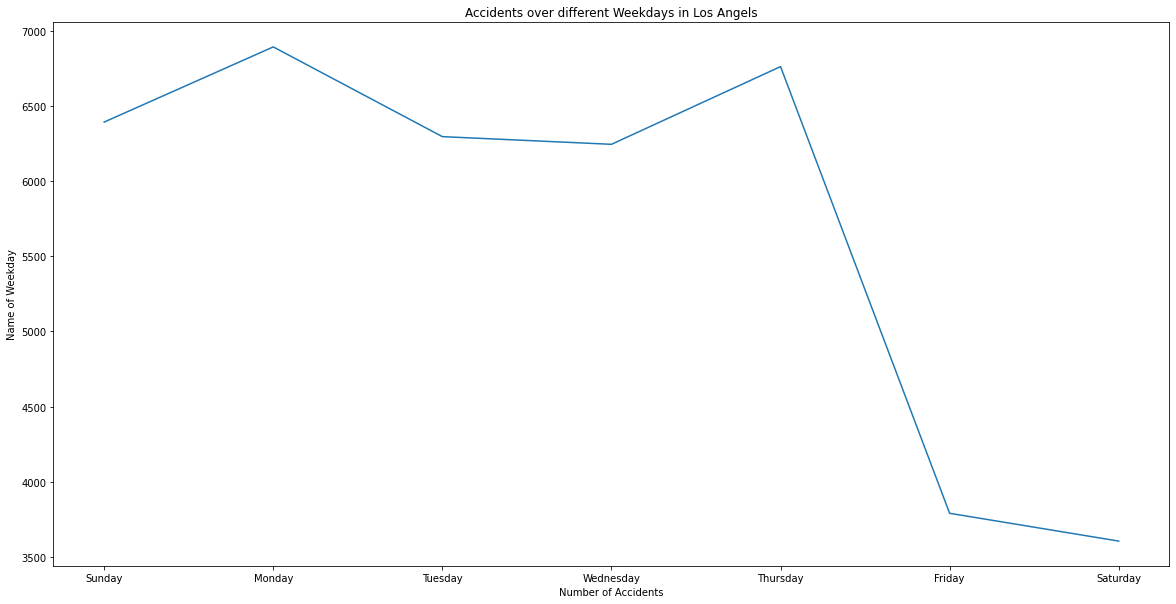

In [181]:
plt.figure(figsize=(20,10))
plt.plot(day_list,count_list)
plt.xlabel('Number of Accidents')
plt.ylabel('Name of Weekday')
plt.title('Accidents over different Weekdays in Los Angels')
plt.show()

***State ***

***Top 10 States with huge number of accidents and less number of accidents***

In [49]:
Top_ten_state=df.State.value_counts().sort_values(ascending=False)[:10]
print("Top 10 States with Huge Accidents")
print()
print(Top_ten_state)
Bottom_ten_state=df.State.value_counts().sort_values(ascending=True)[:10]
print("Top 10 States with less Accidents")
print()
print(Bottom_ten_state)

Top 10 States with Huge Accidents

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
Name: State, dtype: int64
Top 10 States with less Accidents

SD     213
WY     330
VT     352
ND     455
NM    1467
NE    2178
ME    2202
DE    2331
MS    2790
WV    3242
Name: State, dtype: int64


In [51]:
df.State.describe()

count     1516064
unique         49
top            CA
freq       448833
Name: State, dtype: object

***Start*** ***Time***

In [185]:
# Since Start_Time is a string, we have to parse Start_time into workable Date-Time objects
accident_start_time = pd.to_datetime(df.Start_Time)
accident_start_time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

***Plotting Number of Accidents for different Hours***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

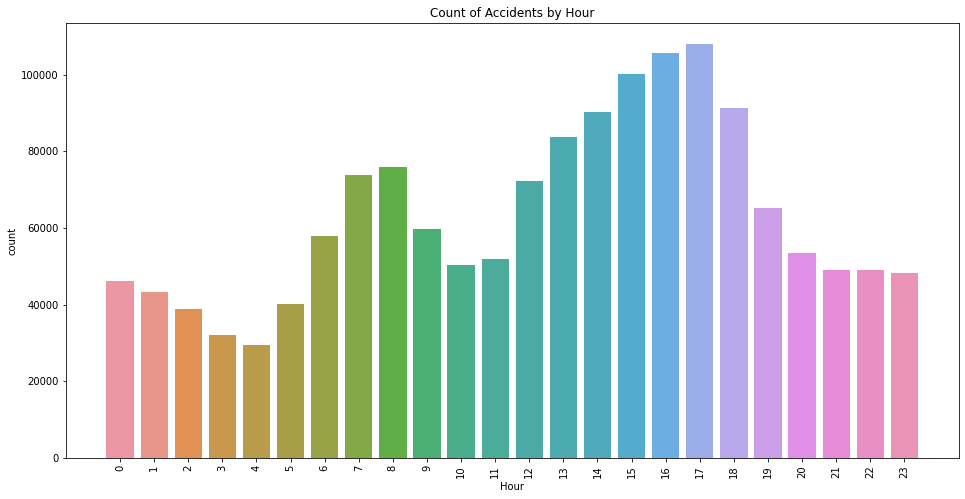

In [187]:
# Get the hour for each accident timestamp
accident_start_time.dt.hour

# Plot a distribution plot for hours
plt.figure(figsize=(16,8))
sns.countplot(accident_start_time.dt.hour)
plt.title('Count of Accidents by Hour')
plt.xticks(np.arange(0,24),np.arange(0,24),rotation=90)
plt.xlabel('Hour')
plt.plot()

***From the Above Graph , we interpret that maximum number of accident are occuring at the 115 th hour***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

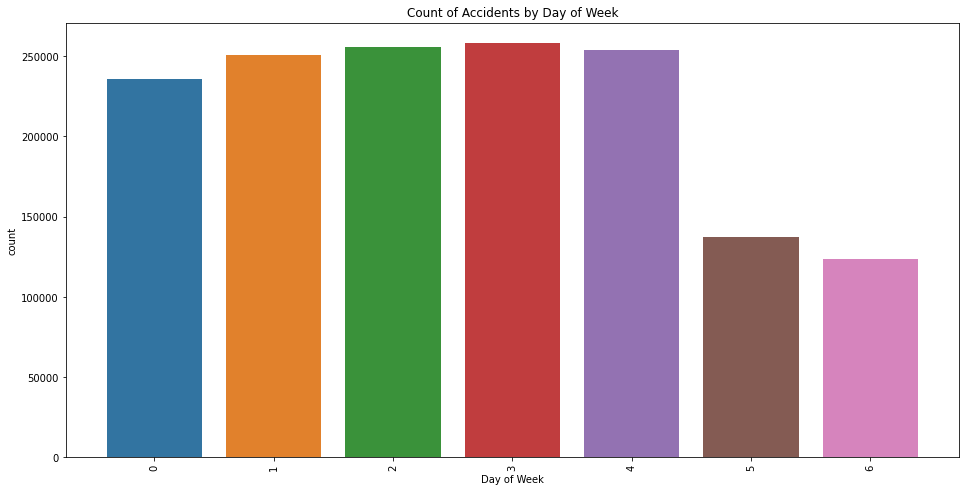

In [188]:
# Get and plot  the day of the week 
accident_start_time.dt.dayofweek
plt.figure(figsize=(16,8))
sns.countplot(accident_start_time.dt.dayofweek)
plt.title('Count of Accidents by Day of Week')
plt.xticks(np.arange(0,7),np.arange(0,7),rotation=90)
plt.xlabel('Day of Week')
plt.plot()

***From the above graph we interpret that maximum accidenta are occuring in the weekday Weekday***

***Distribution of Accidents in Weekends***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

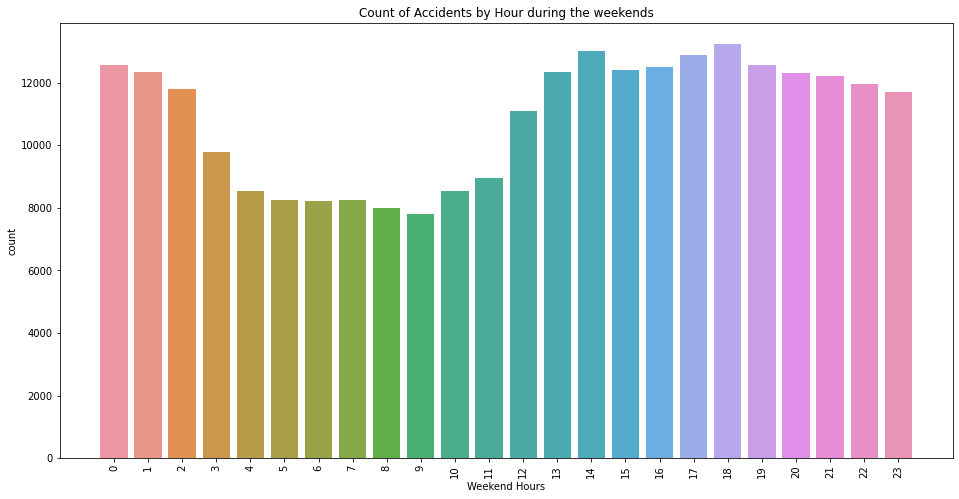

In [189]:
#Distribution of Accidents on the Weekends 
plt.figure(figsize=(16,8))
weekend_accidents = accident_start_time[accident_start_time.dt.dayofweek>=5]
sns.countplot(weekend_accidents.dt.hour)
plt.title('Count of Accidents by Hour during the weekends')
plt.xticks(np.arange(0,24),np.arange(0,24),rotation=90)
plt.xlabel('Weekend Hours')
plt.plot()

***Fromt he above graph we can interpret that maximum number of accidents s are occuring in the 18th hour and minimum number of accidents are occuring in the 9 th hour***

***Distribution of Accidents in the weekdays***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

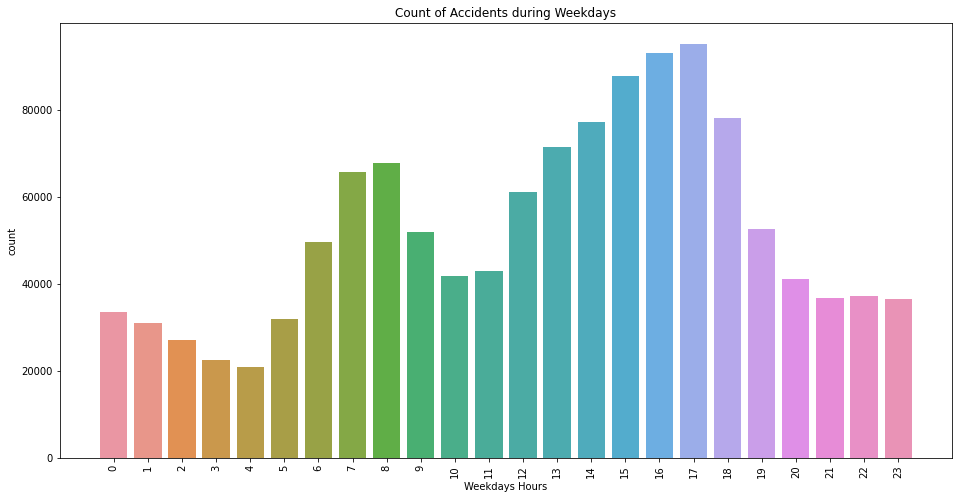

In [190]:
# Distribution of Accidents on the Weekdays 
plt.figure(figsize=(16,8))
weekday_accidents = accident_start_time[accident_start_time.dt.dayofweek<5]
sns.countplot(weekday_accidents.dt.hour)
plt.title('Count of Accidents during Weekdays')
plt.xticks(np.arange(0,24),np.arange(0,24),rotation=90)
plt.xlabel('Weekdays Hours')
plt.plot()

***weekdays  the trend tends to peak  from 1pm to 6pm***

***Distribution of Accidents for different months***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

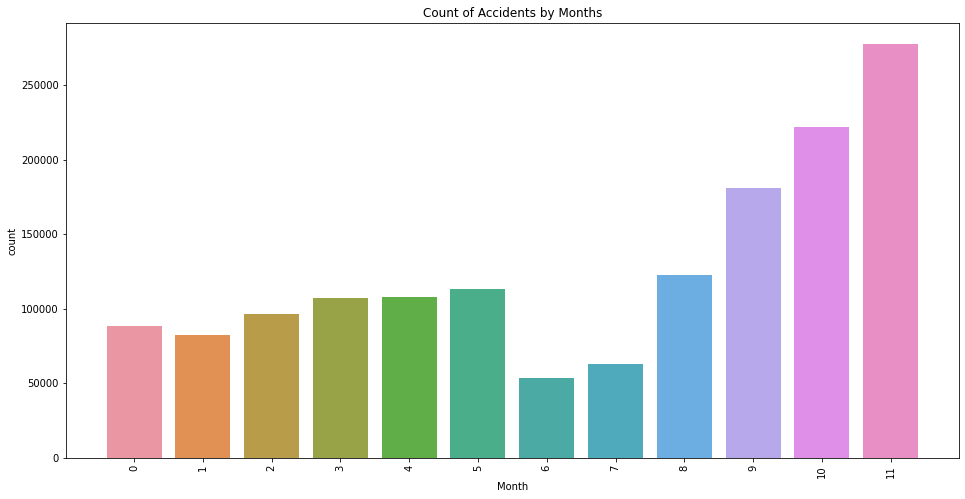

In [191]:
## Get and plot  the Month
plt.figure(figsize=(16,8))
accident_start_time.dt.month
sns.countplot(accident_start_time.dt.month)
plt.title('Count of Accidents by Months')
plt.xticks(np.arange(0,12),np.arange(0,12),rotation=90)
plt.xlabel('Month')
plt.plot()

***December Month ha the huge number of accidents while June Month has less month has less number of accidents***

***Distribution of Accidents over the  Years***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

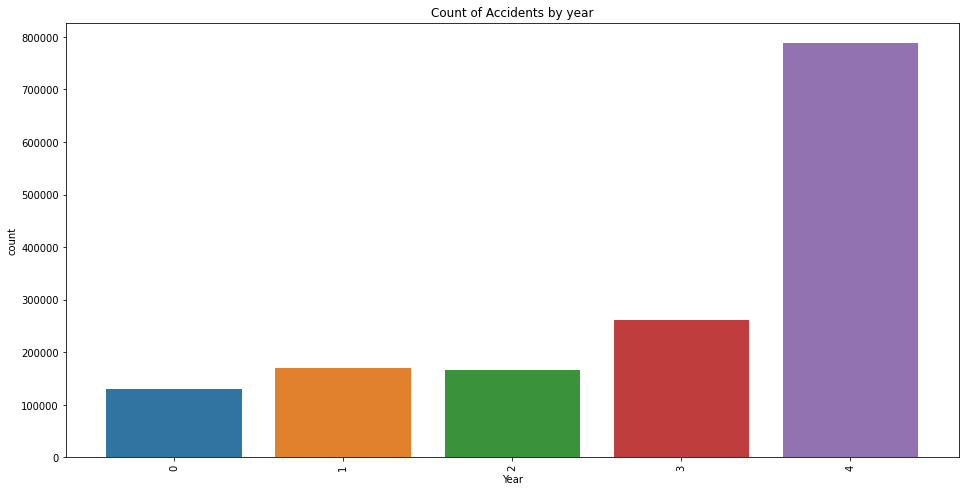

In [195]:
plt.figure(figsize=(16,8))
accident_start_time.dt.year
sns.countplot(accident_start_time.dt.year)
plt.title('Count of Accidents by year')
plt.xticks(np.arange(0,12),np.arange(0,12),rotation=90)
plt.xlabel('Year')
plt.plot()

***The Year 2020 has the highest number of accidents while 2016 year has the less number of accidents***

***Distibution of accident for the year 2020***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

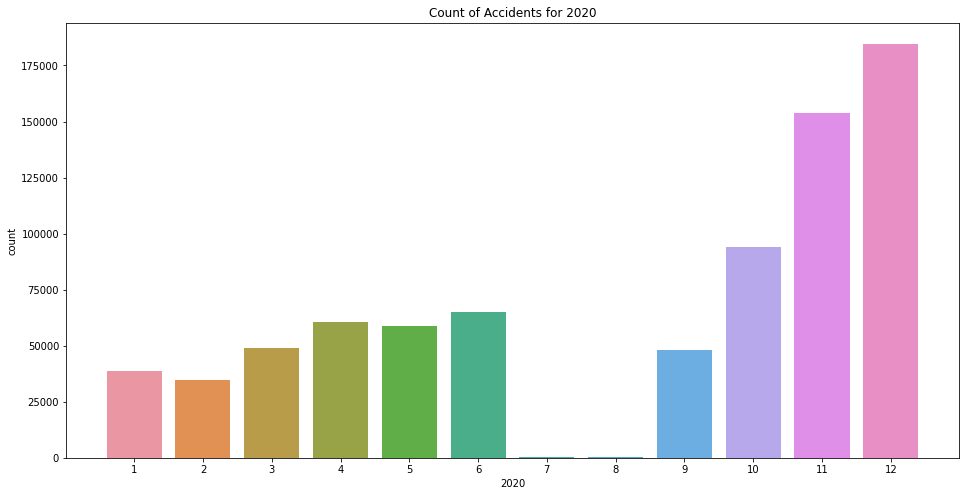

In [196]:
## Distribution of Accident by Year
plt.figure(figsize=(16,8)) 
accidents_2020 = accident_start_time[accident_start_time.dt.year == 2020]
sns.countplot(accidents_2020.dt.month)
plt.title('Count of Accidents for 2020')
plt.xlabel('2020')
plt.plot()

***December has maximum number of accidents in the year 2020 while July and August has the less number of accidents in the year 2020***

***Latitude and Longitude***

***Scatter Plot for Accidents of 5% of Dataset***

[]

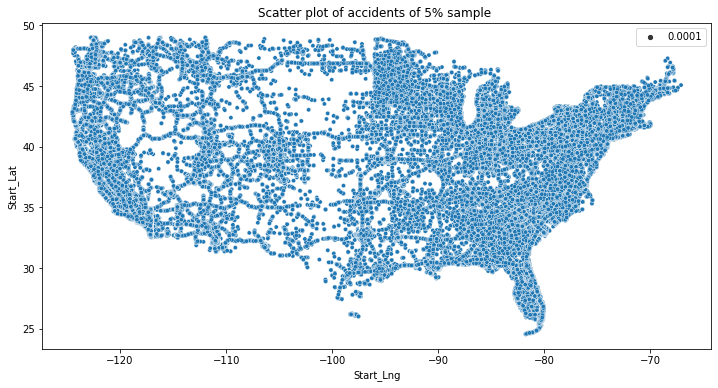

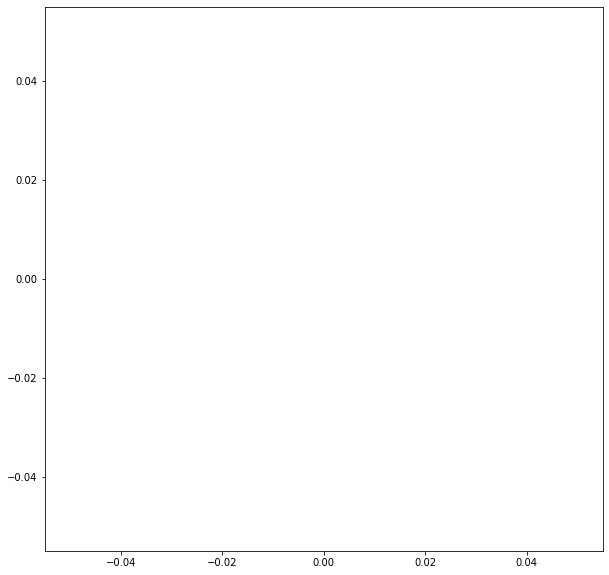

In [9]:
## Scatter plot of accidents of 5% sample
plt.figure(figsize=(12,6))
sample_us_data = df.sample(int(0.05 *len(df)))
sns.scatterplot(x = df.Start_Lng, y = df.Start_Lat, size= 0.0001)
plt.title('Scatter plot of accidents of 5% sample ')
plt.figure(figsize=(10,10))
plt.plot()

***Weather Conditions***

In [11]:
weather_conditions = df.Weather_Condition.unique()
len(weather_conditions)

117

In [12]:
### Weather conditions at the time of the Accidents
weather_accidents = df.Weather_Condition.value_counts()
weather_accidents

Fair                                   465252
Mostly Cloudy                          193595
Clear                                  180223
Cloudy                                 161291
Partly Cloudy                          133102
                                        ...  
Heavy Rain Showers                          1
Heavy Blowing Snow                          1
Light Haze                                  1
Heavy Thunderstorms with Small Hail         1
Heavy Freezing Drizzle                      1
Name: Weather_Condition, Length: 116, dtype: int64

**Ploting Bar for 10 most weather conditions for accidents**

[]

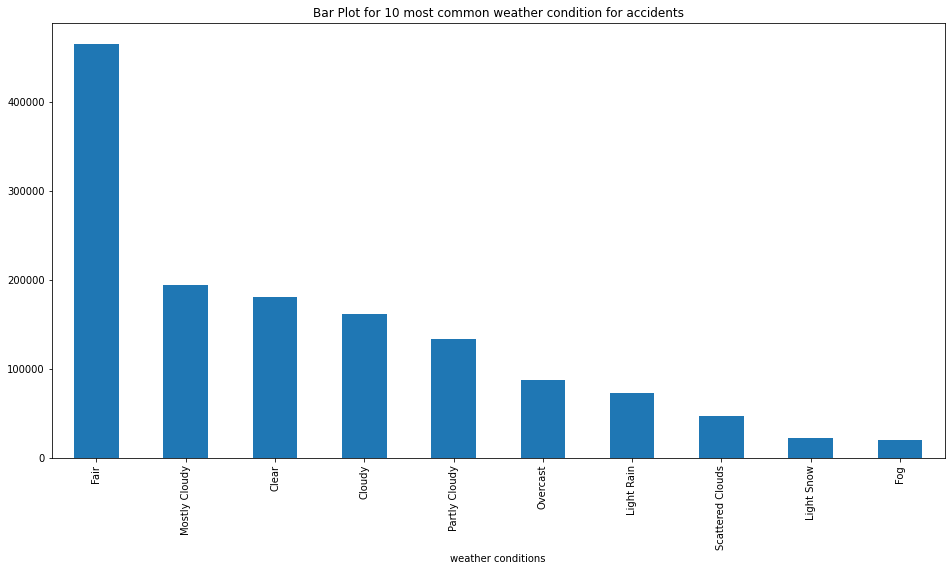

In [13]:
 ## Histogram of the 10 most common weather conditions for accidents 
plt.figure(figsize=(16,8))
weather_accidents[:10].plot(kind= 'bar')
plt.title('Bar Plot for 10 most common weather condition for accidents')
plt.xlabel('weather conditions')
plt.plot()

***Most accidents happen in fair weather conditions with over 400,000 cases***

***Bivariate Analysis***

***Analysis for State and Severity Attributes***

In [14]:
severity = df.Severity
states = df.State.unique()

In [15]:
severity

0          3
1          2
2          2
3          2
4          2
          ..
1516059    2
1516060    2
1516061    2
1516062    2
1516063    2
Name: Severity, Length: 1516064, dtype: int64

In [17]:
state_severity = pd.crosstab(columns=df.Severity, index=df.State)
state_severity

Severity,1,2,3,4
State,,,,
AL,114,7841,786,634
AR,11,3402,302,658
AZ,6695,17620,2229,3641
CA,5544,414365,20603,8321
CO,513,6416,9163,3717
CT,5,10648,2150,2391
DC,42,2617,428,701
DE,7,1060,404,860
FL,2939,129758,11744,8566


***Plotting graph for the each state with different severity level of accident***

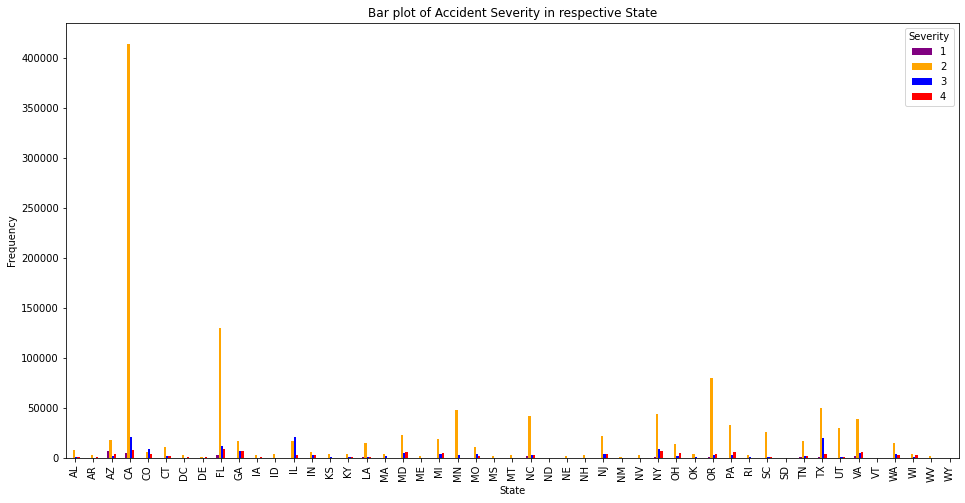

In [18]:
state_severity.plot(kind='bar',figsize=(16,8),color=['purple','orange','blue','red','green'])
plt.title('Bar plot of Accident Severity in respective State')
plt.ylabel('Frequency')
plt.show()

***State with more number of high severity of  accidents***

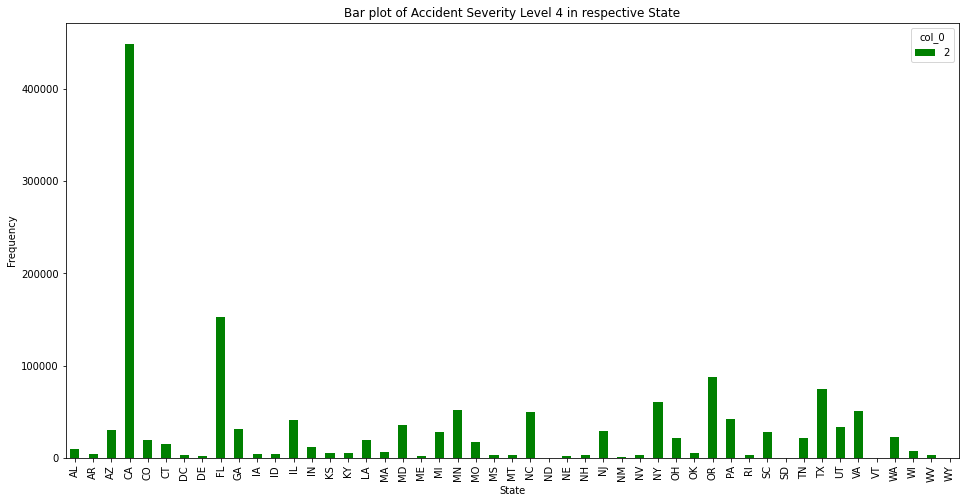

In [20]:
## States with the most level 4 severity accidents
deadly_state = pd.crosstab(columns=df.Severity[4], index=df.State)
deadly_state
deadly_state.plot(kind='bar',figsize=(16,8),color='green')
plt.title('Bar plot of Accident Severity Level 4 in respective State')
plt.ylabel('Frequency')
plt.show()

***State California has the most number of high severity accident***

***Wind Speed and Severity***

(0.0, 100.0)

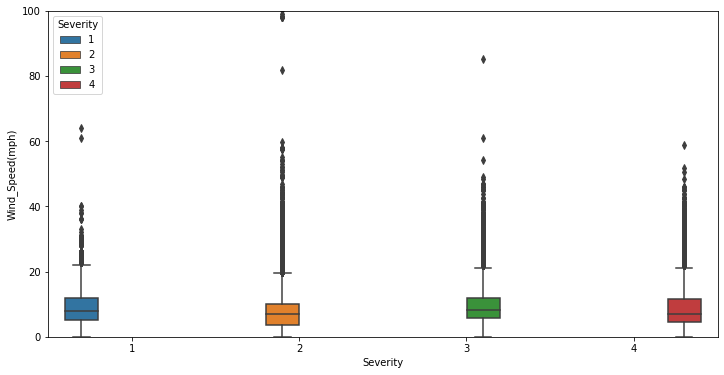

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Severity',y='Wind_Speed(mph)',data=df,hue='Severity')
plt.ylim(0,100)

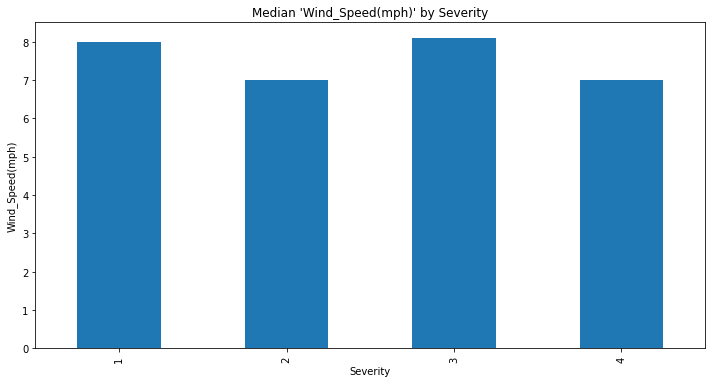

In [29]:
# Due to many outliers in the plot above, mean would skew the data so median was used
plt.figure(figsize=(12,6))
.groupby('Severity')['Wind_Speed(mph)'].median().plot(kind='bar')
plt.ylabel('Wind_Speed(mph)')
plt.title("Median 'Wind_Speed(mph)' by Severity")
plt.show()

***Accident Start Time and Severity***

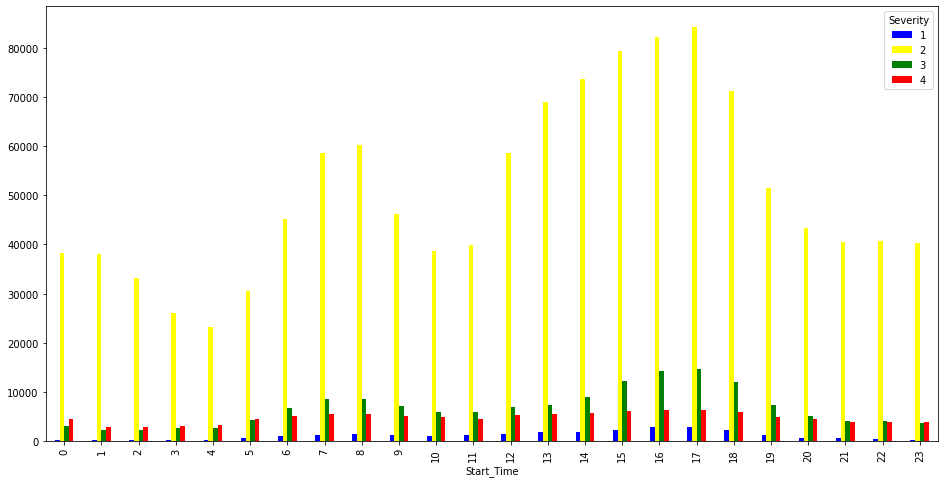

In [39]:
Start_Time_converted=pd.to_datetime(df.Start_Time)
x = pd.crosstab(index=Start_Time_converted.dt.hour, columns=df.Severity)
x.plot(kind='bar', color=['blue','yellow','green','red'],figsize=(16,8))
plt.show()

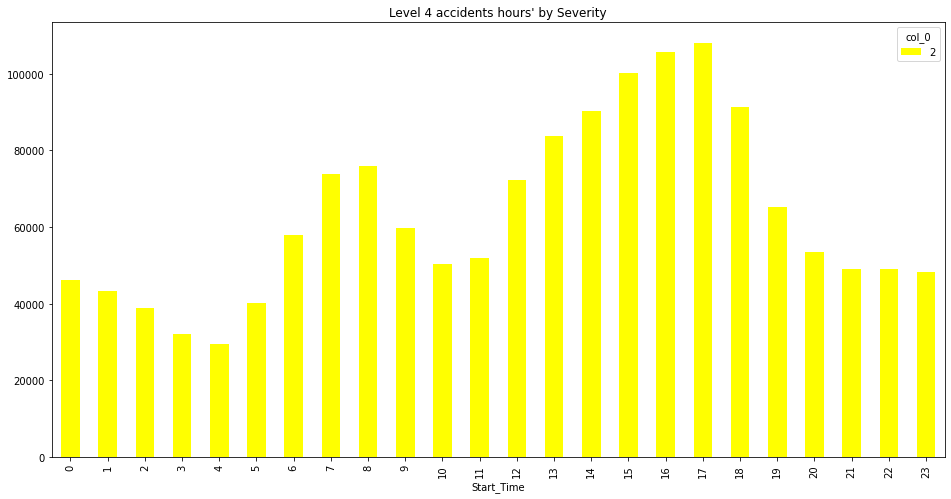

In [42]:
deadliest_hours = pd.crosstab(index=Start_Time_converted.dt.hour, columns=df.Severity[4])
deadliest_hours.plot(kind='bar',color='yellow', figsize=(16,8))
plt.title("Level 4 accidents hours' by Severity")
plt.show()

***Accidents of Severity level 4  highly occurs in the 17th Hour***